# Machine Learning Superconductivity
## Valentin Stanev

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
# import matplotlib
plt.style.use('ggplot')

## Read the data

Import the data using pandas and have a quick look with some basic functions (shape, head() , describe())

In [2]:
data = pd.read_csv('SC_Magpie_short_July2018.csv')
data.shape

(5000, 147)

In [3]:
data.head()

,name,Tc,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,Ba0.4K0.6Fe2As2,31.20,4,0.583781,0.506891,0.459606,0.441643,0.428710,30.360000,37,...,229,166,197.5,0.198312,0.126582,0.675105,0.000000,0,0.370230,0.101293
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.10,5,0.606413,0.557901,0.543545,0.542136,0.541937,22.677795,49,...,229,12,12.0,0.277798,0.340779,0.381423,0.000000,0,0.803211,0.321647
2,Mo0.39Ru0.61,6.90,2,0.724017,0.659084,0.622509,0.613736,0.610693,43.220000,2,...,229,194,194.0,0.138504,0.000000,0.861496,0.000000,0,0.000400,0.000190
3,Tm4Os6Sn19,1.10,3,0.700772,0.663969,0.655637,0.655203,0.655173,58.000000,26,...,194,141,141.0,0.126638,0.082969,0.493450,0.296943,0,0.201983,0.036805
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.85,6,0.512258,0.435720,0.405168,0.400893,0.400075,36.658000,75,...,225,12,70.0,0.187652,0.286921,0.187652,0.337774,0,0.866866,0.228340


In [4]:
data.describe()

,Tc,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,17.764056,3.782400,0.666107,0.613098,0.589417,0.583504,0.580220,32.897374,42.876000,13.660242,...,223.362400,92.263600,119.649567,0.260425,0.196841,0.422148,0.120587,0.085800,0.429854,0.157577
std,26.877259,1.359934,0.113094,0.133586,0.146384,0.150995,0.154115,15.114648,20.982094,7.748662,...,14.294388,84.730544,93.195976,0.128849,0.140684,0.198432,0.177696,0.280097,0.328886,0.135529
min,0.000000,1.000000,0.405518,0.311149,0.261681,0.243939,0.229751,3.600000,0.000000,0.000000,...,12.000000,2.000000,2.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031350,3.000000,0.598827,0.542853,0.512974,0.508302,0.505126,23.116433,28.000000,7.405500,...,225.000000,12.000000,12.000000,0.180151,0.067077,0.290279,0.000000,0.000000,0.109169,0.027424
50%,4.917500,4.000000,0.633697,0.579160,0.558962,0.552045,0.543108,27.624600,48.000000,15.020400,...,229.000000,64.000000,152.000000,0.252266,0.193234,0.377451,0.007244,0.000000,0.340336,0.098666
75%,21.600000,5.000000,0.734302,0.688848,0.669860,0.667185,0.666707,39.289286,57.000000,18.406861,...,229.000000,194.000000,209.500000,0.297580,0.323272,0.588235,0.200067,0.000000,0.787757,0.320432
max,134.700000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.000000,89.000000,41.500000,...,229.000000,229.000000,229.000000,1.000000,0.656931,0.941176,0.875000,1.000000,0.921450,0.415601


Check for NaN

In [5]:
data.isna().values.any()
#data.isna().sum().sum()

False

How many compounds have no $T_c$?

In [6]:
print("number of compounds without Tc:",(data['Tc']==0).sum())
print("number of compounds with Tc:",(~(data['Tc']==0)).sum())
data['Tc'][~(data['Tc']==0)].describe()

number of compounds without Tc: 1237
number of compounds with Tc: 3763


count    3763.000000
mean       23.603583
std        28.671379
min         0.001000
25%         3.500000
50%        10.100000
75%        32.600000
max       134.700000
Name: Tc, dtype: float64

### Pandas also have ploting functions.

Let's check the distribution of $T_s$'s

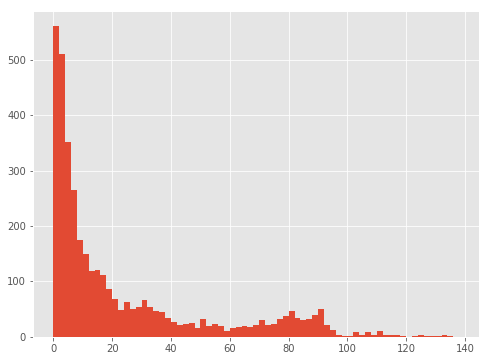

In [7]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 6.0)
data["Tc"][data["Tc"]>0].hist(bins = range(0,140, 2))

In [8]:
data[['Tc', 'name']][:20]

,Tc,name
0,31.20,Ba0.4K0.6Fe2As2
1,40.10,Ca0.4Ba1.25La1.25Cu3O6.98
2,6.90,Mo0.39Ru0.61
3,1.10,Tm4Os6Sn19
4,4.85,Nd1Bi0.99Pb0.01S2F0.3O0.7
5,9.40,V0.784Ga0.172Al0.044
6,33.00,La1.71Sr0.29Cu0.94Co0.06O4
7,0.00,Re0.1W0.9
8,2.90,N0.82V1
9,9.70,Be0.86Pb0.14


## Divide into groups

Check each compound name and divide into:

* Cuprates - contain Cu and O

- Fe-based - contain Fe and As/Se/Te/S/P

- Low-$T_c$ - verything else

In [9]:
data["Cuprate"] = data["name"].apply(lambda x: 1 if "Cu" in x and "O" in x else 0)
data["Fe-based"] = data.name.apply(lambda x: 1 if ("Fe" in x and "As" in x) 
                                          or ("Fe" in x and "Se" in x)
                                          or ("Fe" in x and "S" in x)
                                          or ("Fe" in x and "Te" in x)
                                          or ("Fe" in x and "P" in x)
                                          else 0)
print("number of cuprates: " )
print((data["Cuprate"]==1).sum())
print("number of Fe-based: " )
print((data["Fe-based"]==1).sum())
print("number of others: " )
print(((data["Fe-based"]==0)&(data["Cuprate"]==0)).sum())
# (data["Cuprate"]==1).sum() + (data["Fe-based"]==1).sum() +((data["Fe-based"]==0)&(data["Cuprate"]==0)).sum()

number of cuprates: 
1726
number of Fe-based: 
482
number of others: 
2831


Almost works (but not quite)

In [10]:
print(data[(data["Fe-based"]==1)&(data["Cuprate"]==1)].shape[0])
data[(data["Fe-based"]==1)&(data["Cuprate"]==1)]

indCuFe = data[(data["Fe-based"]==1)&(data["Cuprate"]==1)].index
data.set_value(indCuFe, "Fe-based", 0);

39


/home/stanev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


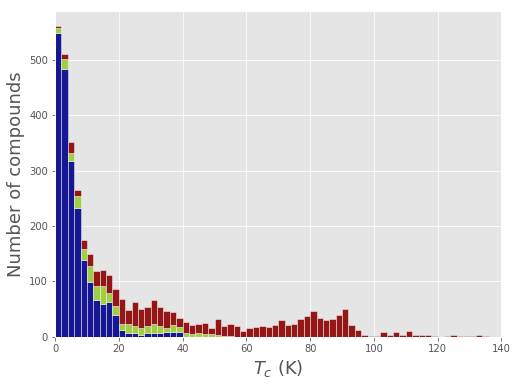

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)
cond_Cu = (data["Cuprate"]==1)
cond_Fe = (data["Fe-based"]==1)
cond_Low = (data["Cuprate"]==0)&(data["Fe-based"]==0)

Tc_low = data["Tc"][data["Tc"]>0][cond_Low]
Tc_Cu = data["Tc"][data["Tc"]>0][cond_Cu]
Tc_Fe = data["Tc"][data["Tc"]>0][cond_Fe]

plt.hist([Tc_low, Tc_Fe, Tc_Cu], stacked=True, color = ['DarkBlue','YellowGreen','DarkRed' ], 
         bins = range(0, 140, 2), alpha = 0.9, edgecolor='white', linewidth=0.5)
plt.xlim(0, 140)
plt.ylabel('Number of compounds', fontsize=18)
plt.xlabel(r'$T_c$ (K)', fontsize=18)    

# a = plt.axes([0.42, 0.45, .45, .4])
# plt.hist(np.log(y[y>10]),  bins= 50, alpha = 1, color= 'darkred')
# plt.text(2.5, 300,r'$T_c > 10$ K', ha='left', va='center', fontsize=18)
# plt.xlim(2.2, 5)
# # plt.ylabel('Number', fontsize=14)
# plt.xlabel(r'$\log (T_c)$ (K)', fontsize=14)    
plt.show()

## Check for correlated predictors

Calculate the correlation matrix 

Visualize it 

In [12]:
feature_list = data.columns[2:147]
feature_corr =  data[feature_list].corr().abs()

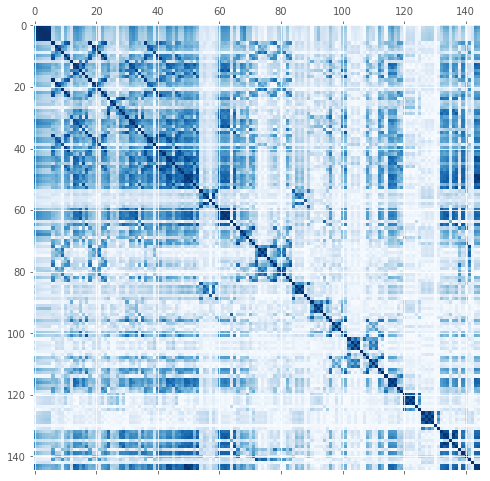

In [19]:
from matplotlib import cm as cm
cmap = cm.get_cmap("Blues")
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.matshow(feature_corr, cmap=cmap)
# plt.colorbar()
plt.show()